In [1]:
import os
os.chdir('../../')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='paper', font_scale=2, style='whitegrid')

In [2]:
files_style_1 = [
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2012-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2013-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2014-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2015-data.xls'
]

files_style_2 = [
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2016-data.xls',
]

files_style_3 = [
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2017-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2018-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2019-data.xls',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2020-data.xlsx',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2021-data.xlsx',
    'data/raw/EEX EUA Auctions/emission-spot-primary-market-auction-report-2022-data.xlsx',
    'data/raw/EEX EUA Auctions/primary_auction_report_20230214_39969994.xlsx'
]

In [3]:
eua_auctions = pd.Series(dtype='float64')
for file in files_style_1:
    eua_auctions = pd.concat([
        eua_auctions,
        pd.read_excel(
            file,
            header=2,
            index_col='Date',
            parse_dates=True
        )['Auction Price €/tCO2']
    ])

for file in files_style_2:
    eua_auctions = pd.concat([
        eua_auctions,
        pd.read_excel(
            file,
            header=2,
            index_col='Date',
            parse_dates=True
        )['Auction Price EUR/tCO2']
    ])

for file in files_style_3:
    eua_auctions = pd.concat([
        eua_auctions,
        pd.read_excel(
            file,
            header=5,
            index_col='Date',
            parse_dates=True
        )['Auction Price €/tCO2']
    ])

d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\anaconda3\envs\ba\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
eua_auctions.sample(n=10).sort_values()

2014-05-26     4.98
2012-03-20     7.25
2015-12-11     7.98
2018-11-06    16.99
2018-07-23    17.20
2018-10-10    20.38
2018-09-26    20.40
2020-11-19    26.72
2021-09-14    61.51
2022-05-23    78.96
dtype: float64

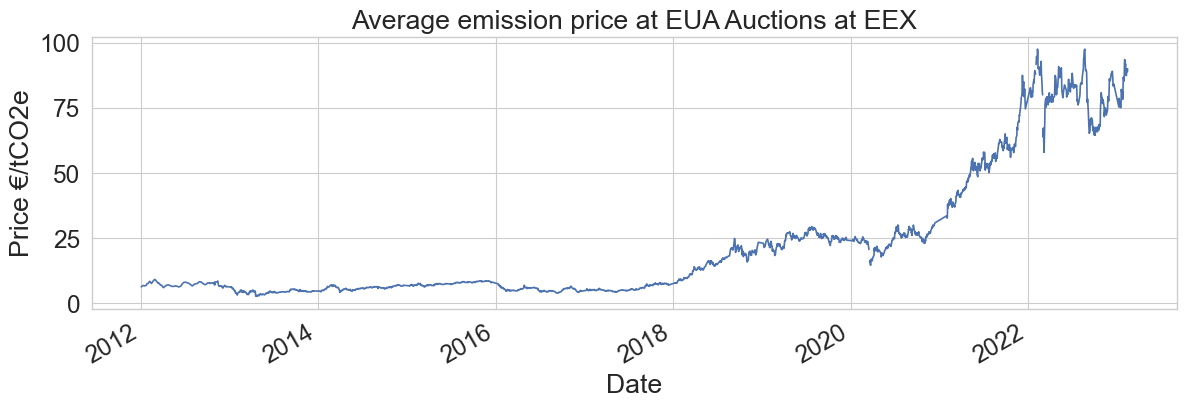

In [5]:
fig, ax = plt.subplots(figsize=(14, 4))
eua_auctions.plot(ax=ax)

ax.set_title('Average emission price at EUA Auctions at EEX')
ax.set_ylabel('Price €/tCO2e')
ax.set_xlabel('Date')

# Save plot
fig.savefig("diagrams/data_overview_005_001.svg", format="svg", bbox_inches="tight")